In [83]:
import cv2
import random
import os
import pytesseract
import PIL
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
%matplotlib inline

In [84]:
print(cv2.__version__)

4.4.0


In [85]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [86]:
path="C:/Users/Admin/Desktop/download.jpg"

In [87]:
image=cv2.imread(path)

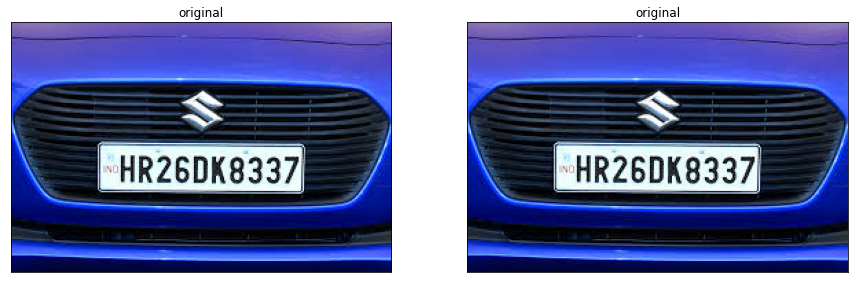

In [88]:
plot_images(image,image,title1="original",title2="original")

In [89]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

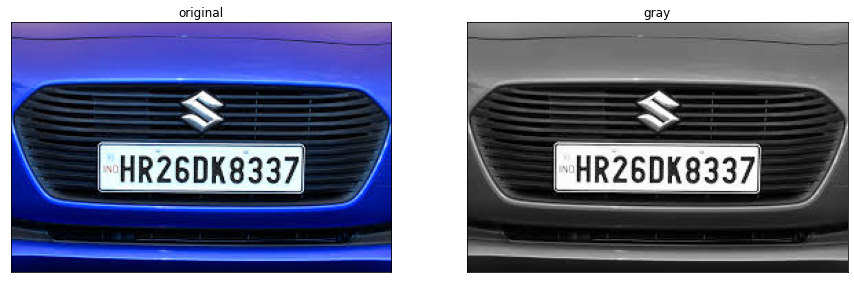

In [90]:
plot_images(image,gray,title1="original",title2="gray")

In [91]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

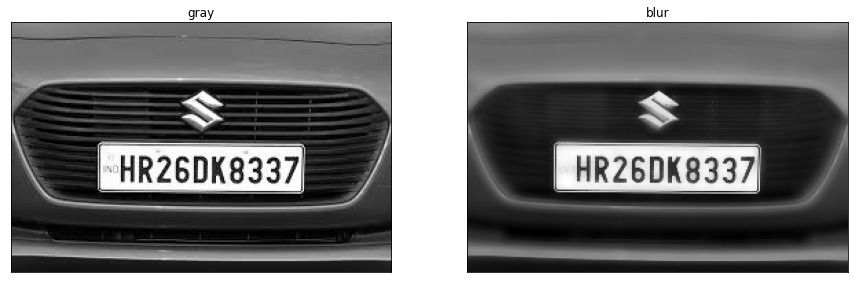

In [92]:
plot_images(gray,blur,title1="gray",title2="blur")

In [93]:
edges = cv2.Canny(blur, 30, 200)

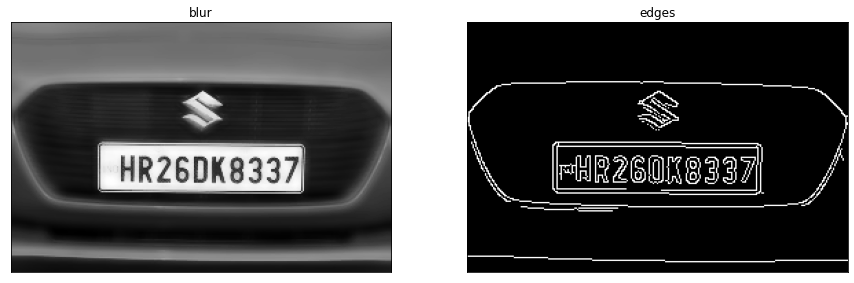

In [94]:
plot_images(blur,edges,title1="blur",title2="edges")

In [95]:

cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [96]:

image_copy = image.copy()

In [97]:

_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)


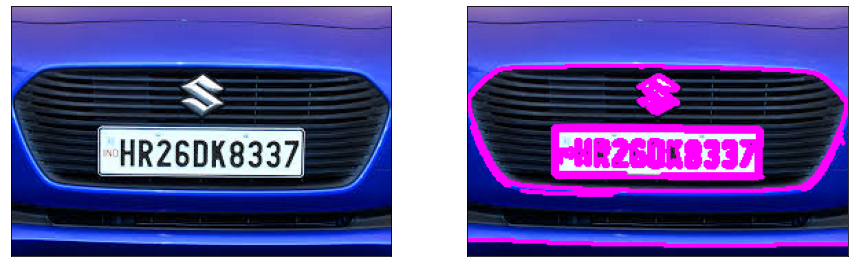

In [98]:

plot_images(image, image_copy)

In [99]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [100]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

In [101]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

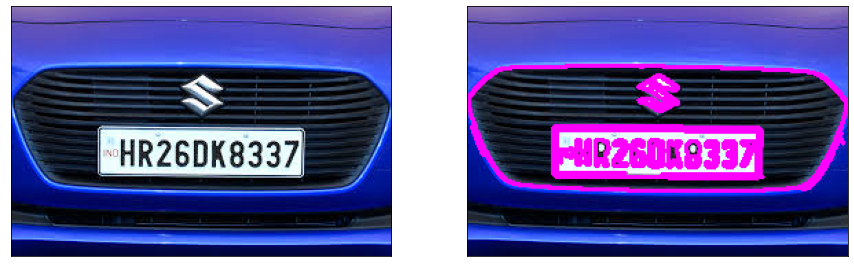

In [102]:
plot_images(image, image_copy)

In [103]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

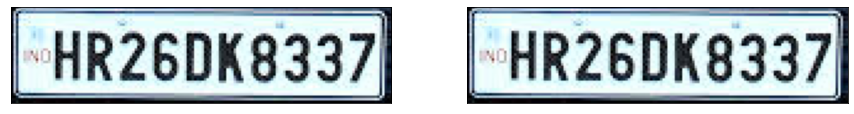

In [104]:
plot_images(plate, plate)

In [105]:
import pytesseract 
from PIL import Image
im=Image.open("plate.png")
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(im, lang="eng")
print(text)

~HR26DK8337,



In [106]:
mytext=text
language='en'

In [110]:
output=gTTS(text=mytext,lang=language)

In [108]:
output.save("numberplate.mp3")

In [109]:
os.system("start numberplate.mp3")

0